<a href="https://colab.research.google.com/github/hetal-tiwari/Resume-Recommendation-System/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
import numpy as np 
import pandas as pd
df = pd.read_csv('resume_dataset.csv' ,encoding='utf-8')
df['cleaned_resume'] = ''
df.head()

,ID,Category,Resume,cleaned_resume
0,1,Data Science,Skills * Programming Languages: Python (pandas...,
1,2,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,3,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,4,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,5,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URl
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [ ]:
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
print (df['cleaned_resume'][31])

 Good communication skill Quick learner Keen to find solutionsEducation Details MBA Marketing and International Business Management Pune Maharashtra Pune University B Tech Tech Nagpur Maharashtra M Nagpur UniversityG M Arts Commerce ScienceG M Arts Commerce ScienceSkill Details Company Details company Samarth College description of Engineering 30 7 210 5 College to campus VJ College of Pharmacy 10 days workshop 10 G M Arts Commerce Science 6 Soft Skills 6 days workshop 6 College Personality G M Institute of Agricultural 7 6 days workshop 6 Development Diploma 8 Soft Skills Samarth College of Polytechnic 20 days workshop 20 TOTAL 350 WORKING EXPERIENCE IN CORPORATE Sr No Topic Company No of days Total Hrs 1 Presentation skill Team Elringklinger Automotives Pvt 1 Day 8 building Workshop Ltd Ranjangaon Pune 2 Negotiation skill Kubler Automation Pvt Ltd 2 days 16 Communication skill Chakan Pune 3 Business Communication Finanza Home Loans Pimple 3 days 21 Stress management saudagar Pune 4 T

In [ ]:
vectorizer = CountVectorizer(min_df=0, lowercase=False, stop_words='english')
vectorizer.fit(df['cleaned_resume'])
vectorizer.vocabulary_

{'Skills': 5112,
 'Programming': 4339,
 'Languages': 3188,
 'Python': 4409,
 'pandas': 8725,
 'numpy': 8557,
 'scipy': 9408,
 'scikit': 9407,
 'learn': 8161,
 'matplotlib': 8341,
 'Sql': 5199,
 'Java': 2991,
 'JavaScript': 2993,
 'JQuery': 2968,
 'Machine': 3425,
 'learning': 8165,
 'Regression': 4622,
 'SVM': 4892,
 'Na': 3740,
 've': 10165,
 'Bayes': 815,
 'KNN': 3055,
 'Random': 4548,
 'Forest': 2298,
 'Decision': 1648,
 'Trees': 5627,
 'Boosting': 905,
 'techniques': 9880,
 'Cluster': 1250,
 'Analysis': 506,
 'Word': 6028,
 'Embedding': 1977,
 'Sentiment': 5023,
 'Natural': 3762,
 'Language': 3187,
 'processing': 8966,
 'Dimensionality': 1763,
 'reduction': 9160,
 'Topic': 5572,
 'Modelling': 3628,
 'LDA': 3131,
 'NMF': 3727,
 'PCA': 4003,
 'Neural': 3793,
 'Nets': 3787,
 'Database': 1615,
 'Visualizations': 5900,
 'Mysql': 3699,
 'SqlServer': 5200,
 'Cassandra': 1145,
 'Hbase': 2582,
 'ElasticSearch': 1963,
 'D3': 1510,
 'js': 8100,
 'DC': 1531,
 'Plotly': 4227,
 'kibana': 8114,
 

In [ ]:
vectorizer.transform(df['cleaned_resume']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:

features = df['cleaned_resume'].values
labels = df['Category'].values

ft_train, ft_test, lb_train, lb_test = train_test_split(features, labels, test_size=0.25, random_state=1000)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(ft_train)

X_train = vectorizer.transform(ft_train)
X_test  = vectorizer.transform(ft_test)

In [ ]:
X_train

<126x6473 sparse matrix of type '<class 'numpy.int64'>'
	with 22829 stored elements in Compressed Sparse Row format>

ID                 int64
Category          object
Resume            object
cleaned_resume    object
dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(ft_train)

X_train = tokenizer.texts_to_sequences(ft_train)
X_test = tokenizer.texts_to_sequences(ft_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(ft_train[2])
print(X_train[2])

Education Details MCA YMCAUST Faridabad HaryanaData Science internshipSkill Details Data Structure Exprience Less than 1 year months C Exprience Less than 1 year months Data Analysis Exprience Less than 1 year months Python Exprience Less than 1 year months Core Java Exprience Less than 1 year months Database Management Exprience Less than 1 year monthsCompany Details company Itechpower description 
[50, 12, 1885, 3544, 3545, 3546, 95, 3547, 12, 18, 1038, 7, 32, 29, 17, 25, 11, 44, 7, 32, 29, 17, 25, 11, 18, 117, 7, 32, 29, 17, 25, 11, 78, 7, 32, 29, 17, 25, 11, 280, 43, 7, 32, 29, 17, 25, 11, 20, 19, 7, 32, 29, 17, 25, 57, 12, 9, 3548, 13]


In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[  28    2   21    1 1558  170    2 2423   54 1167 1870 1871    3   18
    1    6  677  748   14  750   18   14    2  327    3 3501  138    8
  237    2   18   43 2424 2425   44  357  280   43 1168 1030  217 3502
   44   20 3503  217    1  433  576  678  926   20 3504  109 1350    1
   99  344  217  259   44   44   43  344   20  629  122    8  237   34
   69  630 1559   17  679 1872   15    8 1351 3505 1873  413 2426 2427
   18    5   20   15 3506 1169 1874 1031  358   72 1875 1876  105    3
   48   47]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(lb_train)
y_test = le.transform(lb_test)

 

In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

NameError: ignored

Training Accuracy: 0.0397
Testing Accuracy:  0.0233


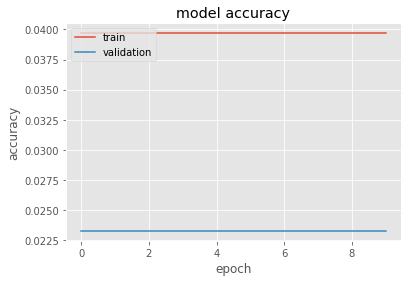

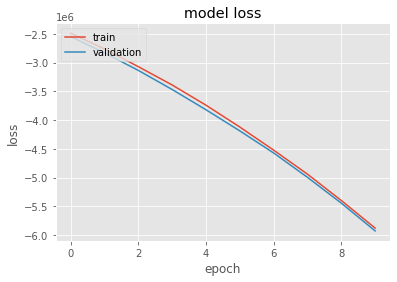

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()